In [1]:
import numpy as np
import pandas as pd

### Import Data

In [2]:
df_raw = pd.read_csv('../Data/drug200.csv')
df_raw.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


### Pre-processing

In [3]:
print(df_raw.shape)
print(df_raw.isnull().sum())
df = df_raw

(200, 6)
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


In [4]:
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

##### Basic stats

In [5]:
all_columns = df.columns

df.loc[:, 'Na_to_K'].describe()

count    200.000000
mean      16.084485
std        7.223956
min        6.269000
25%       10.445500
50%       13.936500
75%       19.380000
max       38.247000
Name: Na_to_K, dtype: float64

##### Split into train-test

In [6]:
n = df.shape[0] // 10

df_population = df.copy()

df_test = df_population.sample(n=n)
df_train = df_population.drop(df_test.index)

df_train.reset_index(drop=True, inplace=True)

print(f'Train size: {df_train.shape}')
print(f'Test size: {df_test.shape}')

Train size: (180, 6)
Test size: (20, 6)


### Setup and Compare

In [7]:
from pycaret.classification import *
exp_mclf = setup(data=df_train, target='Drug', test_data=df_test, normalize=True, session_id=401)

,Description,Value
0,session_id,401
1,Target,Drug
2,Target Type,Multiclass
3,Label Encoded,"DrugY: 0, drugA: 1, drugB: 2, drugC: 3, drugX: 4"
4,Original Data,"(180, 6)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9944,0.9993,0.9900,0.9963,0.9941,0.9920,0.9924,0.1100
dt,Decision Tree Classifier,0.9889,0.9919,0.9860,0.9914,0.9884,0.9839,0.9846,0.0080
lightgbm,Light Gradient Boosting Machine,0.9833,0.9990,0.9835,0.9886,0.9836,0.9762,0.9775,0.0250
gbc,Gradient Boosting Classifier,0.9778,0.9990,0.9660,0.9818,0.9758,0.9676,0.9693,0.1250
et,Extra Trees Classifier,0.9556,0.9958,0.9650,0.9664,0.9568,0.9373,0.9403,0.0950
lr,Logistic Regression,0.9500,0.9973,0.9460,0.9504,0.9461,0.9290,0.9327,0.4370
svm,SVM - Linear Kernel,0.9389,0.0000,0.9385,0.9513,0.9379,0.9142,0.9189,0.0110
ridge,Ridge Classifier,0.9278,0.0000,0.9300,0.9300,0.9239,0.8973,0.9023,0.0090
knn,K Neighbors Classifier,0.8833,0.9756,0.8995,0.9089,0.8821,0.8378,0.8452,0.0160
lda,Linear Discriminant Analysis,0.8667,0.9900,0.9325,0.9115,0.8653,0.8209,0.8373,0.0080


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=401, verbose=0,
                       warm_start=False)

In [9]:
results = pull()
results.Model.to_list()[:5]

['Random Forest Classifier',
 'Decision Tree Classifier',
 'Light Gradient Boosting Machine',
 'Gradient Boosting Classifier',
 'Extra Trees Classifier']

##### Setup2 and compare

In [10]:
exp_mclf2 = setup(data=df_train, target='Drug', normalize=True, transformation=True, remove_multicollinearity=True, multicollinearity_threshold=0.9, session_id=123)

,Description,Value
0,session_id,123
1,Target,Drug
2,Target Type,Multiclass
3,Label Encoded,"DrugY: 0, drugA: 1, drugB: 2, drugC: 3, drugX: 4"
4,Original Data,"(180, 6)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [11]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9923,0.9955,0.9800,0.9872,0.9892,0.9889,0.9897,0.0080
rf,Random Forest Classifier,0.9923,1.0000,0.9800,0.9872,0.9892,0.9889,0.9897,0.1100
lightgbm,Light Gradient Boosting Machine,0.9763,0.9992,0.9567,0.9674,0.9701,0.9662,0.9688,0.0180
gbc,Gradient Boosting Classifier,0.9756,0.9994,0.9500,0.9657,0.9680,0.9652,0.9679,0.1110
lr,Logistic Regression,0.9276,0.9964,0.9147,0.9258,0.9205,0.8987,0.9058,0.0220
svm,SVM - Linear Kernel,0.9205,0.0000,0.8943,0.9082,0.9087,0.8869,0.8939,0.0150
lda,Linear Discriminant Analysis,0.9199,0.9940,0.9413,0.9433,0.9204,0.8912,0.8997,0.0080
et,Extra Trees Classifier,0.9109,0.9951,0.8893,0.9057,0.8986,0.8730,0.8818,0.0970
knn,K Neighbors Classifier,0.9026,0.9827,0.9087,0.9119,0.8969,0.8624,0.8704,0.0150
ridge,Ridge Classifier,0.8385,0.0000,0.7277,0.7871,0.8011,0.7634,0.7792,0.0120


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

### Create Random Forest and Decision Tree models

In [12]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9231,0.9545,0.8000,0.8718,0.8923,0.8889,0.8967
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [13]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9231,1.0000,0.8000,0.8718,0.8923,0.8889,0.8967
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


### Tune both models

In [14]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9231,0.9545,0.8000,0.8718,0.8923,0.8889,0.8967
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [15]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9231,0.9936,0.8000,0.8718,0.8923,0.8889,0.8967
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


### Blend Random Forest and Tuned random forest

In [16]:
blended_model = blend_models(estimator_list=[rf, tuned_rf])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9231,1.0000,0.8000,0.8718,0.8923,0.8889,0.8967
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


### Use test/hold-out set provided in setup for predictions

In [17]:
predict_model(blended_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9636,1.0000,0.9533,0.9703,0.9645,0.9449,0.9459


,Age,Na_to_K,Sex_F,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Drug,Label,Score
0,-1.573016,1.206801,1.0,1.0,0.0,0.0,0.0,DrugY,DrugY,0.9540
1,-1.681887,-0.383615,0.0,0.0,1.0,0.0,1.0,drugC,drugC,0.8055
2,-0.392795,0.011391,0.0,0.0,1.0,0.0,0.0,drugX,drugX,0.7068
3,0.705543,1.321853,1.0,0.0,0.0,1.0,0.0,DrugY,DrugY,0.8579
4,-1.298573,0.476413,0.0,0.0,0.0,1.0,1.0,DrugY,DrugY,0.7874
5,1.285408,-1.388322,1.0,0.0,0.0,1.0,0.0,drugX,drugX,0.8532
6,0.961286,-1.013040,0.0,0.0,0.0,1.0,1.0,drugX,drugX,0.8560
7,-0.392795,0.352008,0.0,0.0,0.0,1.0,1.0,DrugY,DrugY,0.8496
8,1.285408,0.406957,0.0,1.0,0.0,0.0,1.0,DrugY,DrugY,0.7848
9,-0.275684,0.224910,0.0,1.0,0.0,0.0,0.0,DrugY,DrugY,0.7452


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


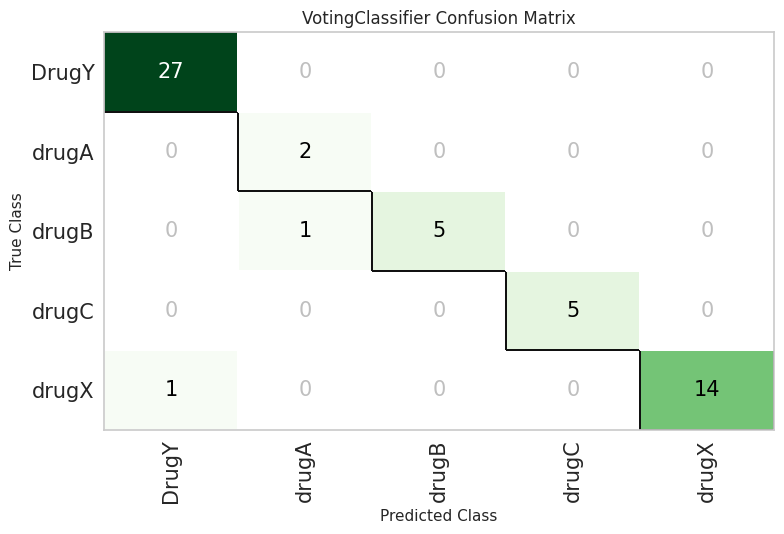

In [18]:
plot_model(blended_model, plot='confusion_matrix')

### Use gradio to demo predictions

In [19]:
import gradio as gr

In [20]:
def predict_drug_class():
   predictions = predict_model(blended_model, data=df_test) 
   return predictions

gr.Interface(predict_drug_class, [], "dataframe").launch()

Running on local URL:  http://127.0.0.1:7860/

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x7f926df883d0>, 'http://127.0.0.1:7860/', None)